### Midterm exam 2023
Name-Lastname:
<br>Student ID:

### Problems
Use Python libraries to analyze the following PM2.5 datasets in order to determine factors that contribute to variations of PM2.5. Scores will be given based on the following issues. (100 pts)
- Import data (10%)
- Explore and prepare data (15%)
- Use appropriate methods to clean data (20%))
- Use appropriate methods to analyze data (15%)
- Use suitable visualization methods to clean, explore and analyze data (25%)
- Summary of the analysis (10%)
- Assocate the AQI index with your analysis (5%)

-To jusify results. You can create addition cells to explain or comments.


### The following dataset is the measurement of the PM2.5 and related environmental parameter. (This datasett is not a pubic dataset and students are required to use this dataset only for the midterm exam of CPDSAI).)

Data dictionary of the PM2.5 datset collected from the weater station near Police station, Chokechai 4, Bankok.

- __Timestame__: the timestamp of the measurement.
- __CO__ : measurement of Carbon monoxide at 3 meter height in ppm (parts per million)
- __NO__ : measurement of Nitrix Oxide at 3 meter height in ppb (parts per billion)
- __NO2__ : measurement of Nitrogen dioxide at 3 meter height in ppb (parts per billion)
- __NOX__ : measurement of the Oxide of Nitrogen dioxide at 3 meter height in ppb (parts per billion)
- __PM10__ : measurement of the microscopic matter, less than 10 µm (micro-meter) in diameter, suspended in air or water at 3 meter height in μg/m3 (microgram per cubic meters)
- __PM2.5__ : measurement of the microscopic matter, less than 2.5 µm (micro-meter) in diameter, suspended in air or water at 3 meter height in μg/m3 (microgram per cubic meters)
- __Wind speed__ : measurement of the wind speed at 10 meter height in m/s (meter per second)
- __Wind dir__ : measurement of the wind direction at 10 meter height in degree
- __Temp__ : measurement of the termperature at 2 meter height in degree Celcius
- __Rel hum__ : measurement of the relative humidity at 2 meter height in percent
- __Pressure__ : measurement of the atmospheric pressure at 2 meter height in mmHg (millimetre of mercury)
- __Rain__ : measurement of the rainfall at 3 meter height in millimeter
__HINT__: To create PM2.5 prediction model, use PM2.5 column as Target (Label)
#### Additional Iinformation
US air quality index (AQI) is categorized into 6 levels ranging from 0 to more than 301 (average for 24 hours). Color of each level characterizes the impact on health. https://www.iqair.com/th/newsroom/what-is-aqi
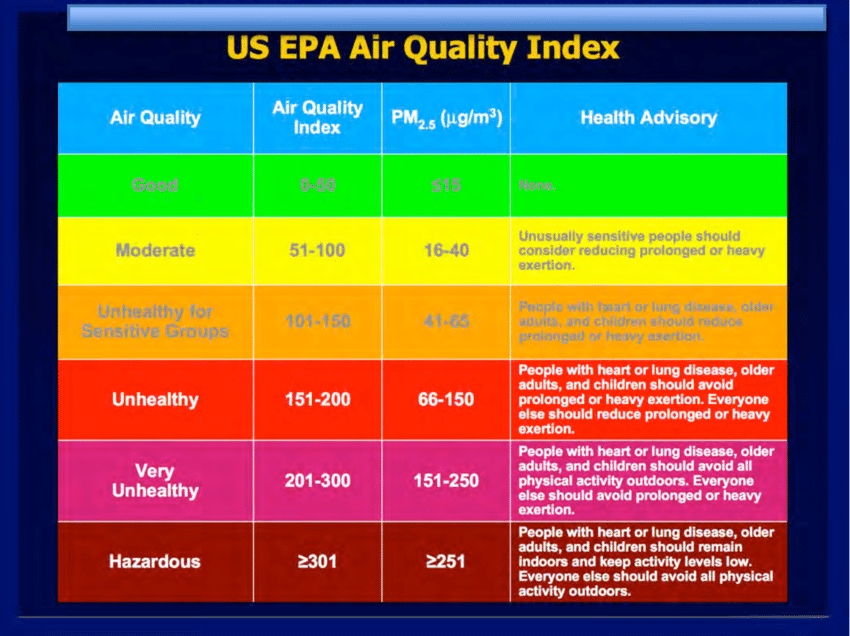

### programing hint

You can use **pandas.DataFrame.resample** method for frequency conversion and resampling of time series. The object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or the caller must pass the label of a datetime-like series/index to the on/level keyword parameter. The syntax of the method is as follows.

**DataFrame.resample(rule, closed=None, label=None, convention='start', on=None, level=None, origin='start_day')**

**Parameters:



*   **rule**: DateOffset, Timedelta or str
The offset string or object representing target conversion e.g. 'H', 'D', 'W', 'M'.
*   **closed**: {‘right’, ‘left’}, default None Which side of bin interval is closed. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.
*   **label**:{‘right’, ‘left’}, default None
Which bin edge label to label bucket with. The default is ‘left’ for all frequency offsets except for ‘M’, ‘A’, ‘Q’, ‘BM’, ‘BA’, ‘BQ’, and ‘W’ which all have a default of ‘right’.
*   **convention**:{‘start’, ‘end’, ‘s’, ‘e’}, default ‘start’
For PeriodIndex only, controls whether to use the start or end of rule.

*   **on**: str, optional
For a DataFrame, column to use instead of index for resampling. Column must be datetime-like.


*   **origin**: Timestamp or str, default ‘start_day’
The timestamp on which to adjust the grouping. The timezone of origin must match the timezone of the index. If string, must be one of the following:

The following example show how to downsample the series with 9 one minutes timestamps into 3 minute bins and sum the values of the timestamps falling into a bin.

__ex.__<br>
series = pd.Series(range(9), index=pd.date_range('1/1/2000', periods=9, freq='T'))

series.resample('3T').sum()

The picture below shows possible rules we can use in resample method.
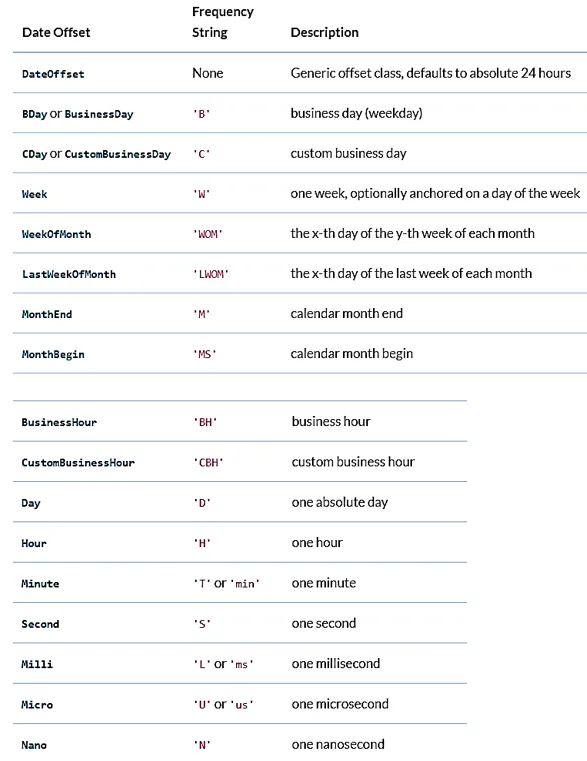


### import libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

In [ ]:
pd.read_ex

### Part I: Import data (10%)
Read data from https://chantri-bucket.s3.amazonaws.com/53t_PM2.5_65_lower_half.csv and put them into the df dataframe with proper delimitter.


In [96]:
#Write your code here
df1 = pd.read_csv('53t_PM2.5_65_lower_half.csv', sep=';')
df2 = pd.read_csv('53t_PM2.5_65_upper_half.csv', sep=';')

df = pd.concat([df1, df2])

# df.columns = [col.strip() for col in df.columns]
# df.columns
df.columns = df.columns.str.strip()
df.columns

Index(['Timestamp', 'CO', 'NO', 'NO2', 'NOX', 'PM10', 'PM2.5', 'Wind speed',
       'Wind dir', 'Temp', 'Rel hum', 'Pressure', 'Rain'],
      dtype='object')

### Part II: Data exploration (10%)

Please provide the findings or information that you discover from this dataset.

###### Summary of findings you discover


1.   List item
2.   List item
3.   List item
4.   List item


Can be more or less than 4

In [97]:
#Write code to show your findings
df.describe()

,CO,NO,NO2,NOX,Wind speed,Wind dir,Temp,Rel hum,Pressure,Rain
count,3495.000000,3517.000000,3517.000000,3518.000000,3694.000000,3694.000000,3692.000000,3681.000000,3687.000000,3651.000000
mean,0.833133,41.715951,32.020472,71.336271,0.466378,152.090146,28.856907,60.685140,757.437754,0.115530
std,0.475910,43.140981,17.939385,54.232435,0.396206,88.954792,2.850301,14.738261,2.419931,1.369294
min,0.000000,0.000000,6.000000,7.000000,0.000000,0.000000,18.700000,26.000000,750.000000,0.000000
25%,0.485000,10.000000,18.000000,30.000000,0.200000,80.000000,27.000000,49.000000,756.000000,0.000000
50%,0.770000,25.000000,28.000000,53.000000,0.300000,115.000000,28.700000,60.000000,758.000000,0.000000
75%,1.090000,60.000000,43.000000,98.000000,0.600000,246.000000,30.800000,71.000000,759.000000,0.000000
max,3.270000,253.000000,120.000000,307.000000,2.700000,360.000000,36.500000,95.000000,768.000000,48.400000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3695 entries, 0 to 1846
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   3695 non-null   object 
 1   CO          3495 non-null   float64
 2   NO          3517 non-null   float64
 3   NO2         3517 non-null   float64
 4   NOX         3518 non-null   float64
 5   PM10        3695 non-null   object 
 6   PM2.5       3695 non-null   object 
 7   Wind speed  3694 non-null   float64
 8   Wind dir    3694 non-null   float64
 9   Temp        3692 non-null   float64
 10  Rel hum     3681 non-null   float64
 11  Pressure    3687 non-null   float64
 12  Rain        3651 non-null   float64
dtypes: float64(10), object(3)
memory usage: 404.1+ KB


In [99]:
df.isna().sum()

Timestamp       0
CO            200
NO            178
NO2           178
NOX           177
PM10            0
PM2.5           0
Wind speed      1
Wind dir        1
Temp            3
Rel hum        14
Pressure        8
Rain           44
dtype: int64

In [100]:
df.duplicated().sum()

24

In [101]:
df[df.duplicated(keep=False)]

,Timestamp,CO,NO,NO2,NOX,PM10,PM2.5,Wind speed,Wind dir,Temp,Rel hum,Pressure,Rain
743,2019-09-01 00:00:00,0.21,7.0,16.0,22.0,23,4,0.3,22.0,27.7,76.0,755.0,0.0
744,2019-09-01 01:00:00,0.34,5.0,15.0,20.0,28,6,0.3,43.0,27.5,75.0,755.0,0.0
745,2019-09-01 02:00:00,0.37,8.0,18.0,27.0,24,6,0.5,44.0,27.3,75.0,755.0,0.0
746,2019-09-01 03:00:00,0.30,3.0,14.0,17.0,27,7,0.4,37.0,27.2,76.0,755.0,0.0
747,2019-09-01 04:00:00,0.21,2.0,7.0,9.0,16,4,0.5,31.0,27.0,77.0,755.0,0.0
748,2019-09-01 05:00:00,0.28,2.0,7.0,8.0,15,4,0.4,347.0,26.6,78.0,755.0,0.0
749,2019-09-01 06:00:00,0.38,4.0,8.0,12.0,15,5,0.3,48.0,25.8,81.0,755.0,0.0
750,2019-09-01 07:00:00,0.41,11.0,14.0,25.0,10,5,0.1,17.0,25.5,85.0,755.0,0.0
751,2019-09-01 08:00:00,0.45,18.0,13.0,30.0,13,4,0.3,25.0,26.5,80.0,756.0,0.0
752,2019-09-01 09:00:00,0.41,6.0,6.0,13.0,25,6,0.5,31.0,27.5,75.0,756.0,0.0


In [102]:
df.rename(columns={'PM2.5': 'PM2_5'}, inplace=True)
df.columns

Index(['Timestamp', 'CO', 'NO', 'NO2', 'NOX', 'PM10', 'PM2_5', 'Wind speed',
       'Wind dir', 'Temp', 'Rel hum', 'Pressure', 'Rain'],
      dtype='object')

In [103]:
df.PM2_5 = df.PM2_5.replace('-', None)
df.PM10 = df.PM10.replace('-', None)

In [104]:
df.PM2_5 = df.PM2_5.astype('float')
df.PM10 = df.PM10.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3695 entries, 0 to 1846
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   3695 non-null   object 
 1   CO          3495 non-null   float64
 2   NO          3517 non-null   float64
 3   NO2         3517 non-null   float64
 4   NOX         3518 non-null   float64
 5   PM10        3680 non-null   float64
 6   PM2_5       3675 non-null   float64
 7   Wind speed  3694 non-null   float64
 8   Wind dir    3694 non-null   float64
 9   Temp        3692 non-null   float64
 10  Rel hum     3681 non-null   float64
 11  Pressure    3687 non-null   float64
 12  Rain        3651 non-null   float64
dtypes: float64(12), object(1)
memory usage: 404.1+ KB


In [105]:
df.Timestamp.min(), df.Timestamp.max()

('2019-08-01 01:00:00', '2019-12-31 23:00:00')

In [106]:
df.Timestamp = pd.to_datetime(df.Timestamp)

df['month'] = df.Timestamp.dt.month
df['day'] = df.Timestamp.dt.day
df['hour'] = df.Timestamp.dt.hour

df.drop(columns=['Timestamp'], inplace=True)
df.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'PM10', 'PM2_5', 'Wind speed', 'Wind dir',
       'Temp', 'Rel hum', 'Pressure', 'Rain', 'month', 'day', 'hour'],
      dtype='object')

In [107]:
for feat in df.columns:
    Q1 = df[feat].quantile(0.25)
    Q3 = df[feat].quantile(0.75)
    IQR = Q3 - Q1

    outliers = df[(df[feat] < (Q1 - 1.5 * IQR)) | (df[feat] > (Q3 + 1.5 * IQR))]
    print(f"Feature: {feat} has {outliers.shape[0]} outliers")

Feature: CO has 79 outliers
Feature: NO has 183 outliers
Feature: NO2 has 46 outliers
Feature: NOX has 116 outliers
Feature: PM10 has 66 outliers
Feature: PM2_5 has 123 outliers
Feature: Wind speed has 235 outliers
Feature: Wind dir has 0 outliers
Feature: Temp has 39 outliers
Feature: Rel hum has 0 outliers
Feature: Pressure has 65 outliers
Feature: Rain has 114 outliers
Feature: month has 0 outliers
Feature: day has 0 outliers
Feature: hour has 0 outliers


In [108]:
df.isna().sum()

CO            200
NO            178
NO2           178
NOX           177
PM10           15
PM2_5          20
Wind speed      1
Wind dir        1
Temp            3
Rel hum        14
Pressure        8
Rain           44
month           0
day             0
hour            0
dtype: int64

### Part III: Choose appropriate methods to clean data (20%)

Justify the methods that you select. Show results after cleaning.


In [109]:
df.shape

(3695, 15)

In [110]:
#Write your code here.
df.drop_duplicates(inplace=True)
df.shape

(3671, 15)

In [111]:
df.dropna(subset=['PM2_5'], inplace=True)
df.shape

(3651, 15)

In [90]:
df.isna().sum()

CO            196
NO            174
NO2           174
NOX           173
PM10            1
PM2_5           0
Wind speed      1
Wind dir        1
Temp            3
Rel hum        14
Pressure        8
Rain           44
month           0
day             0
hour            0
dtype: int64

In [113]:
keys = df.isna().sum().keys()

for i, val in enumerate(df.isna().sum()):
    # Lets fill everything with mean
    df[keys[i]].fillna(df[keys[i]].mean(), inplace=True)

df.isna().sum()

C:\Users\eraco\AppData\Local\Temp\ipykernel_4816\565501629.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[keys[i]].fillna(df[keys[i]].mean(), inplace=True)


CO            0
NO            0
NO2           0
NOX           0
PM10          0
PM2_5         0
Wind speed    0
Wind dir      0
Temp          0
Rel hum       0
Pressure      0
Rain          0
month         0
day           0
hour          0
dtype: int64

In [114]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f"{col} has {outliers.shape[0]}")


# for feat in df.columns:
#     print(feat)
    # Q1 = df[feat].quantile(0.25)
    # Q3 = df[feat].quantile(0.75)
    # IQR = Q3 - Q1

    # outliers = df[(df[feat] < (Q1 - 1.5 * IQR)) | (df[feat] > (Q3 + 1.5 * IQR))]
    # print(f"Feature: {feat} has {outliers.shape[0]} outliers")

CO has 107
NO has 221
NO2 has 53
NOX has 146
PM10 has 66
PM2_5 has 100
Wind speed has 235
Wind dir has 0
Temp has 39
Rel hum has 0
Pressure has 65
Rain has 156
month has 0
day has 0
hour has 0


In [115]:
df.columns

Index(['CO', 'NO', 'NO2', 'NOX', 'PM10', 'PM2_5', 'Wind speed', 'Wind dir',
       'Temp', 'Rel hum', 'Pressure', 'Rain', 'month', 'day', 'hour'],
      dtype='object')

## EDA

#### Part IV: Data analysis (20%)
Use appropriate methods to answer the following questions


1.   What factors contribute to the variations of PM2.5? (**Hint**: check other features that you have from your data (e.g. temperature, win, pressure or rain) and try to justify its impact based on the data.)
2.   How does the PM2.5 concentration fluctuate over a period of time? (Choose appropriate time duration).

Please justify all of your answers. Figures or tables are recommended to use for explanation.


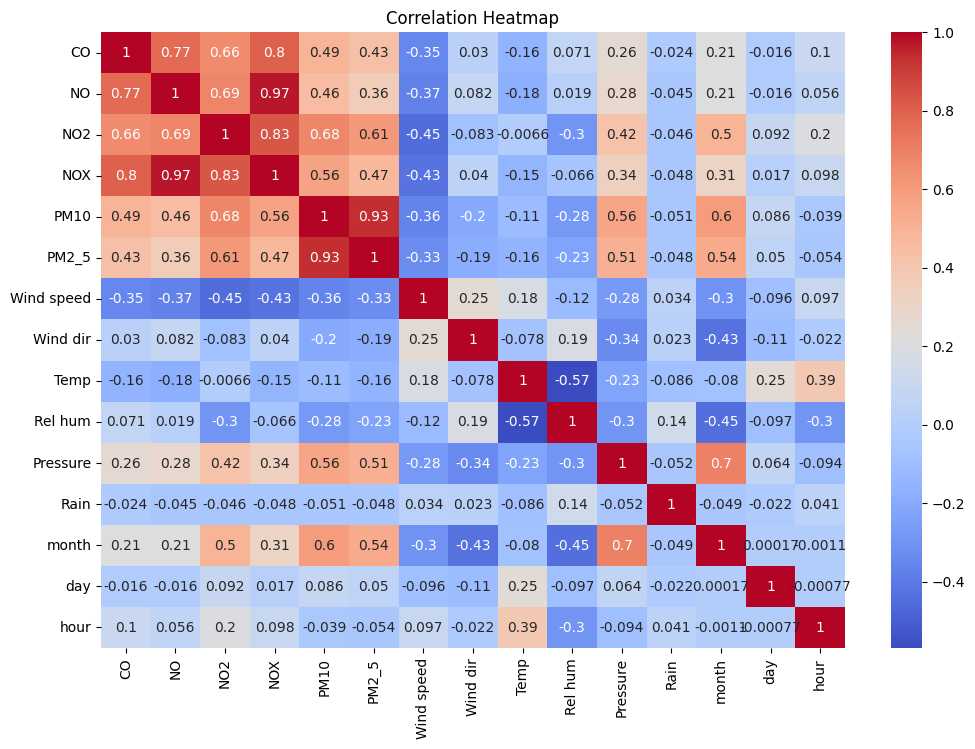

In [117]:
#Write your code to answer questions
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

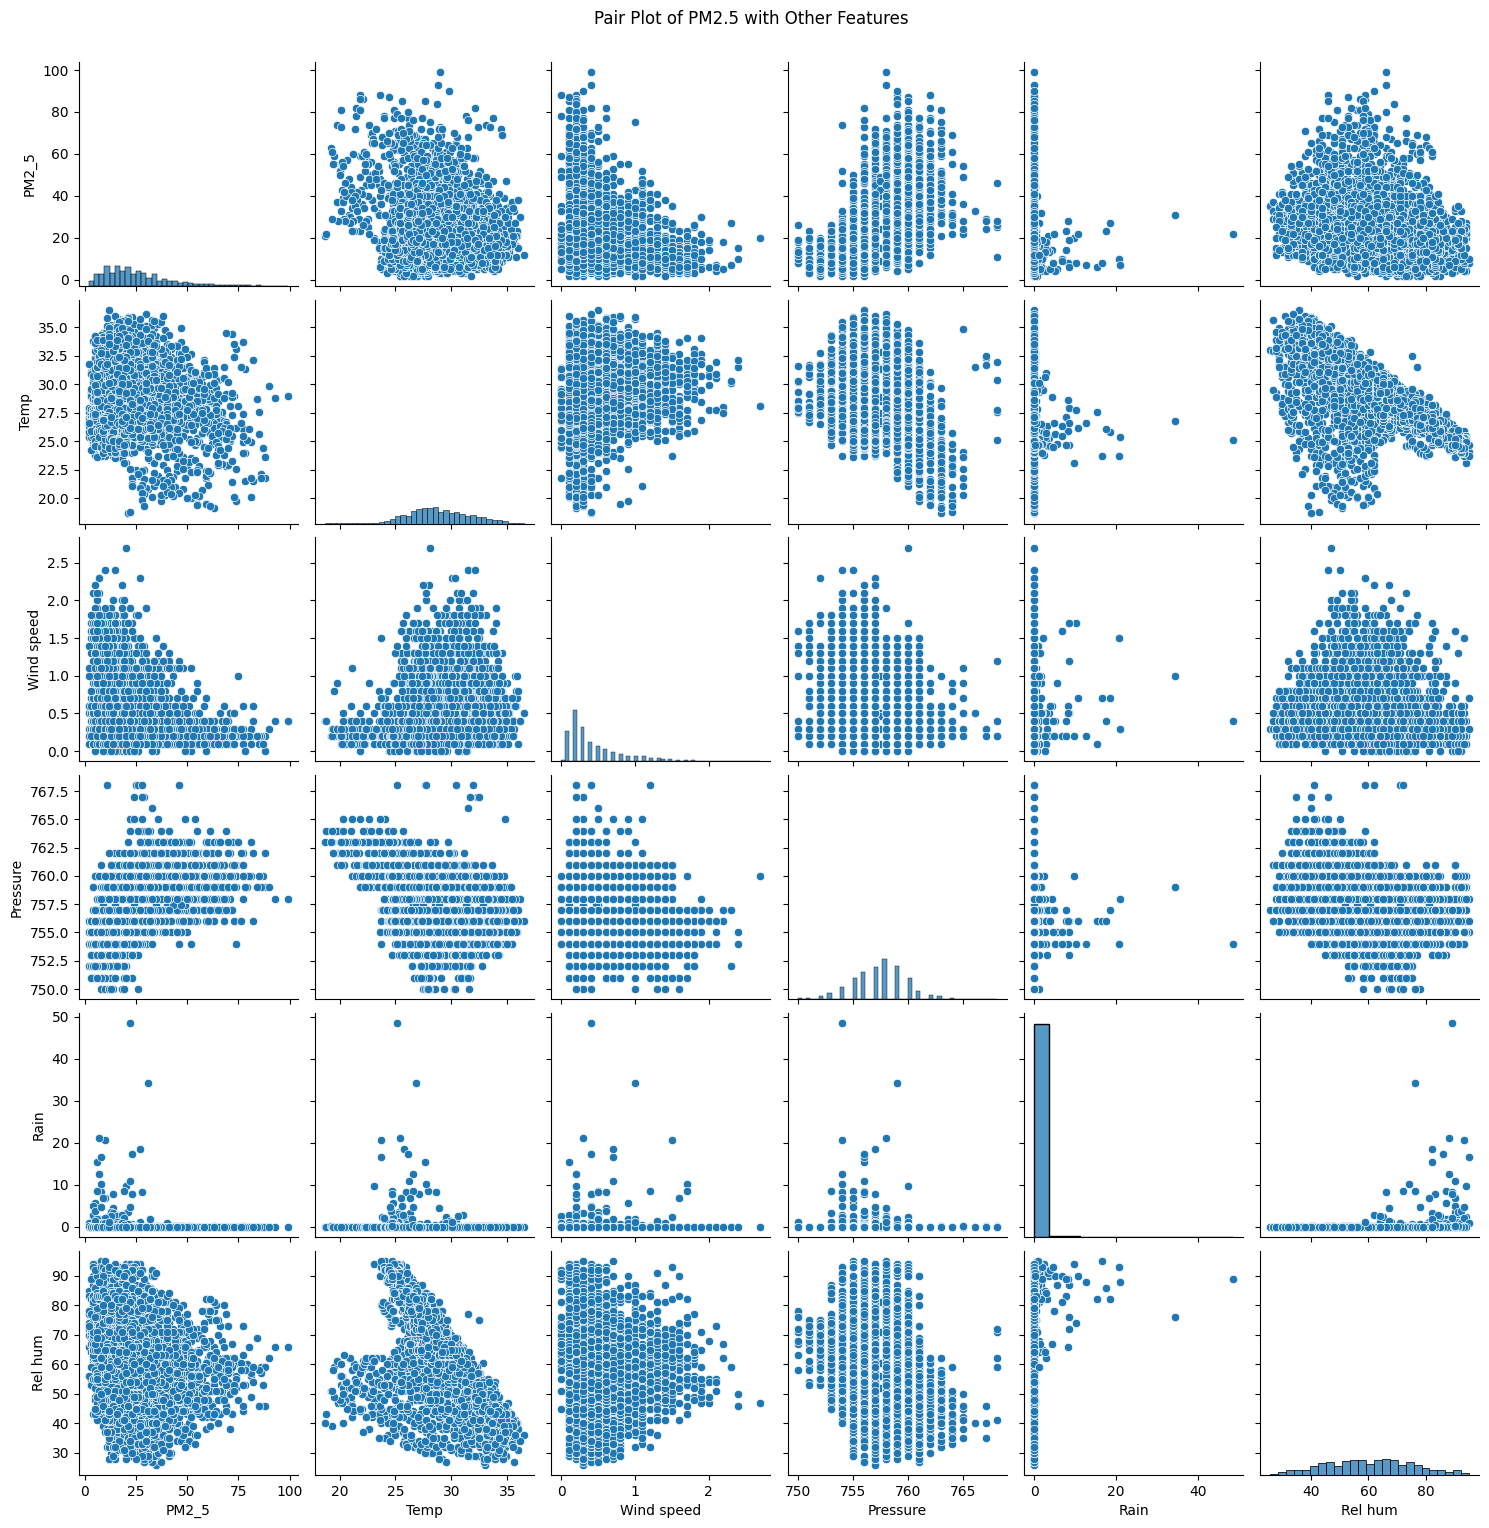

In [120]:
selected_features = ['PM2_5', 'Temp', 'Wind speed', 'Pressure', 'Rain', 'Rel hum']
sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot of PM2.5 with Other Features', y=1.02)
plt.show()


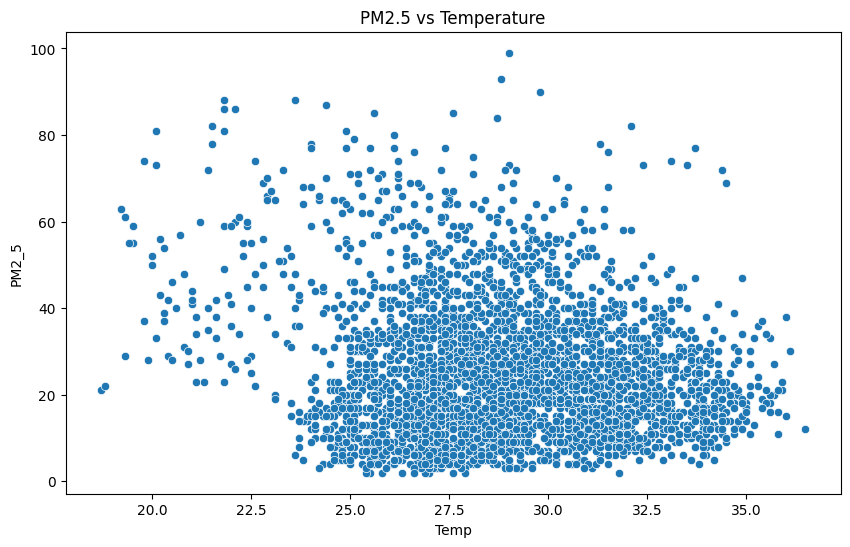

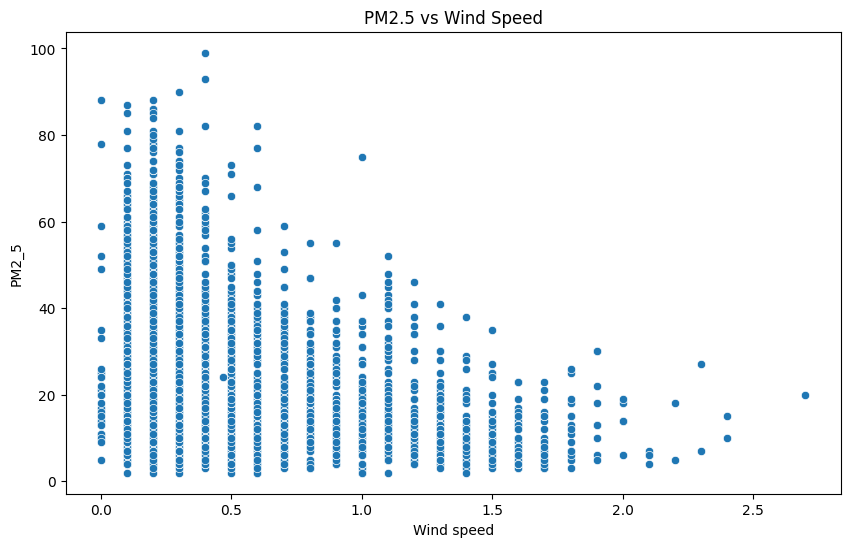

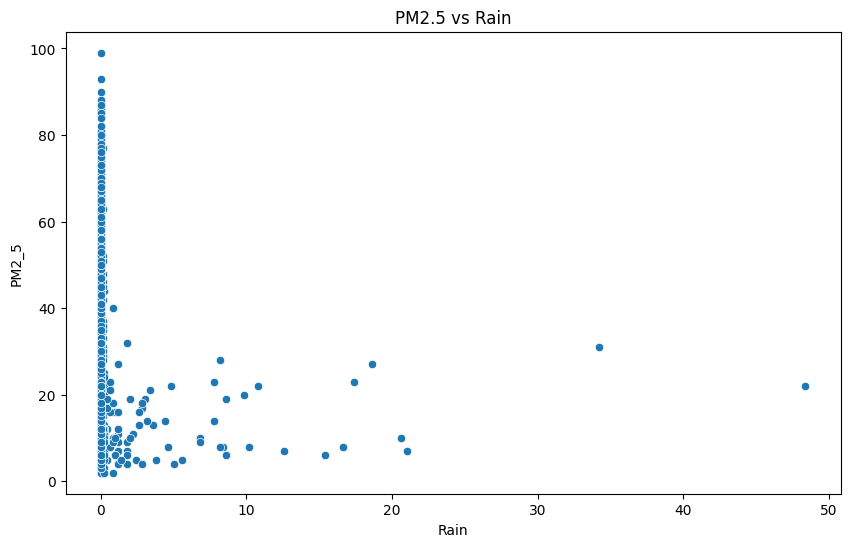

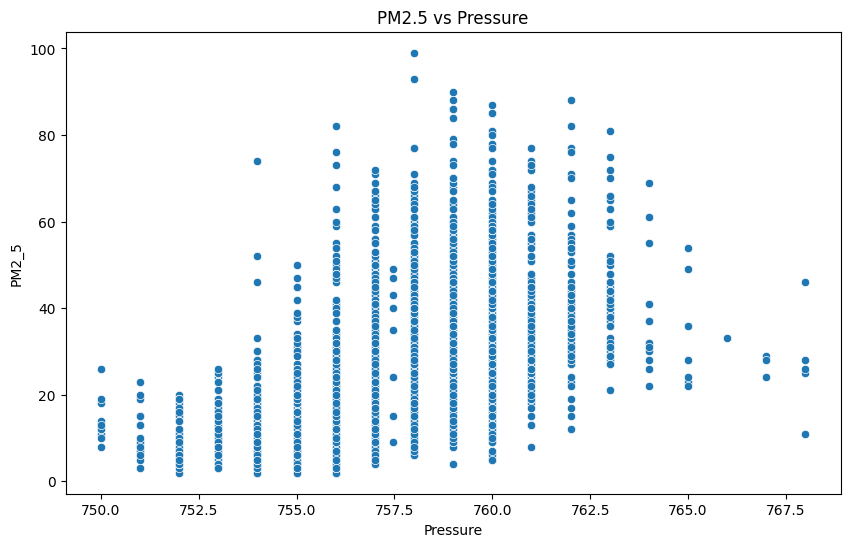

In [122]:
data = df
# Scatter plot between PM2.5 and Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp', y='PM2_5', data=data)
plt.title('PM2.5 vs Temperature')
plt.show()

# Scatter plot between PM2.5 and Wind Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wind speed', y='PM2_5', data=data)
plt.title('PM2.5 vs Wind Speed')
plt.show()

# Scatter plot between PM2.5 and Rain
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rain', y='PM2_5', data=data)
plt.title('PM2.5 vs Rain')
plt.show()

# Scatter plot between PM2.5 and Pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pressure', y='PM2_5', data=data)
plt.title('PM2.5 vs Pressure')
plt.show()


#### Part V: Summary of your findings. (10%)

Write your answer here.